In [ ]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


algorithmType=SteadyStateGA
populationSize=150
epochs=-1
elitism=1
replacementNumber=10
crossover=CrossoverAverage
mutationSigma=0.1
mutationProbability=1.0
mutation=MutationGaussian
parentsNumber=2
selectionPressure=2.0
selection=SelectionLinearRanking
survival=SurvivalBestFitness


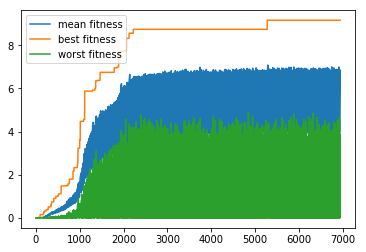

In [ ]:
mean_fitness = []
best_fitness = []
worst_fitness = []

properties = False
scores = False
with open('logs/output.log') as f:
    for line in f.readlines():
        line = line.replace('\n', '')
        if line == "Properties:":
            properties = True
        elif line == "EndProperties":
            properties = False
        elif line == "Scores:":
            scores = True
        elif line == "EndScores":
            scores = False
        elif properties:
            print line
        elif scores:
            line = line.replace(',', '').split()
            mean_fitness.append(line[1])
            best_fitness.append(line[2])
            worst_fitness.append(line[3])

plot(mean_fitness, label="mean fitness")
plot(best_fitness, label="best fitness")
plot(worst_fitness, label="worst fitness")
plt.legend()